In [18]:
import pandas as pd
import json
import requests
from api_keys import crime_api_key
from pprint import pprint
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("nibrs_incident_2008.csv")
data.head()

,agency_id,incident_id,nibrs_month_id,incident_number,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,ddocname,orig_format,ff_line_number,did
0,18798,45276972,4517571,08001581,NaN,NaN,2008-01-29 00:00:00,NaN,15.0,6,NaN,0,C,2008_01_TX0140700_08001581_INC_NIBRS,NaN,NaN,NaN
1,18798,45276087,4517571,08001325,NaN,NaN,2008-01-11 00:00:00,NaN,9.0,6,NaN,0,C,2008_01_TX0140700_08001325_INC_NIBRS,NaN,NaN,NaN
2,18798,45280827,4517571,08003199,NaN,NaN,2008-01-26 00:00:00,NaN,8.0,6,NaN,0,C,2008_01_TX0140700_08003199_INC_NIBRS,NaN,NaN,NaN
3,18798,45275019,4517571,08000661,NaN,NaN,2008-01-25 00:00:00,NaN,9.0,6,NaN,0,C,2008_01_TX0140700_08000661_INC_NIBRS,NaN,NaN,NaN
4,18798,45275020,4517571,08000663,NaN,NaN,2008-01-24 00:00:00,NaN,17.0,6,NaN,0,C,2008_01_TX0140700_08000663_INC_NIBRS,NaN,NaN,NaN


In [20]:
data_1 = data[["agency_id","incident_date","ddocname"]]


In [21]:
data_1["agency_name"] = data_1["ddocname"].str[8:17]
data_1.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,agency_id,incident_date,ddocname,agency_name
0,18798,2008-01-29 00:00:00,2008_01_TX0140700_08001581_INC_NIBRS,TX0140700
1,18798,2008-01-11 00:00:00,2008_01_TX0140700_08001325_INC_NIBRS,TX0140700
2,18798,2008-01-26 00:00:00,2008_01_TX0140700_08003199_INC_NIBRS,TX0140700
3,18798,2008-01-25 00:00:00,2008_01_TX0140700_08000661_INC_NIBRS,TX0140700
4,18798,2008-01-24 00:00:00,2008_01_TX0140700_08000663_INC_NIBRS,TX0140700


In [22]:
data_1["incident_date"] = data_1["incident_date"].str[:7]
data_1.head()

C:\Users\Oleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,agency_id,incident_date,ddocname,agency_name
0,18798,2008-01,2008_01_TX0140700_08001581_INC_NIBRS,TX0140700
1,18798,2008-01,2008_01_TX0140700_08001325_INC_NIBRS,TX0140700
2,18798,2008-01,2008_01_TX0140700_08003199_INC_NIBRS,TX0140700
3,18798,2008-01,2008_01_TX0140700_08000661_INC_NIBRS,TX0140700
4,18798,2008-01,2008_01_TX0140700_08000663_INC_NIBRS,TX0140700


In [23]:
data_1.drop('ddocname', axis=1, inplace=True)
data_1.head()

,agency_id,incident_date,agency_name
0,18798,2008-01,TX0140700
1,18798,2008-01,TX0140700
2,18798,2008-01,TX0140700
3,18798,2008-01,TX0140700
4,18798,2008-01,TX0140700


In [24]:
data_1.count()

agency_id        259871
incident_date    259871
agency_name      259871
dtype: int64

In [25]:
data_1.agency_id.nunique()

59

In [26]:
data_2 = data_1.groupby("incident_date").agency_id.count()

In [47]:
data_2 = pd.DataFrame(data_2)
data_2.reset_index(inplace=True)
data_2.head()

,incident_date,agency_id
0,2008-01,20858
1,2008-02,18910
2,2008-03,21450
3,2008-04,22279
4,2008-05,23255


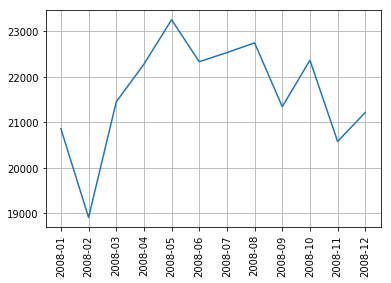

In [53]:
plt.plot(data_2.incident_date, data_2.agency_id)
plt.xticks(rotation=90)
plt.grid()

In [42]:
pd.DataFrame(data_2)

,agency_id
incident_date,
2008-01,20858
2008-02,18910
2008-03,21450
2008-04,22279
2008-05,23255
2008-06,22332
2008-07,22533
2008-08,22746
2008-09,21345


In [ ]:
#saving unique agencies names
agencies = pd.DataFrame(data_1.agency_name.unique())

agencies.to_csv("all_agencies_from_data_2008.csv")